In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pyriemann.clustering import Kmeans

In [2]:
data = pd.read_csv('tb2_data_clean.csv', sep=';')
data.head()

,MMSI,LAT,LON,TIMESTAMP
0,994080063,-5.884088,137.317055,1621911328
1,994071322,-5.555122,135.582663,1621911290
2,994071292,-7.422388,133.898840,1621910145
3,994071012,-9.833815,140.398638,1621909493
4,994071005,-9.831913,140.389897,1621908942


In [3]:
data = data.iloc[:,1:3]
data

,LAT,LON
0,-5.884088,137.317055
1,-5.555122,135.582663
2,-7.422388,133.898840
3,-9.833815,140.398638
4,-9.831913,140.389897
...,...,...
470300,-6.097003,106.886702
470301,-6.097007,106.886708
470302,-6.097015,106.886715
470303,-6.097018,106.886715


In [4]:
data.values

array([[ -5.88408833, 137.317055  ],
       [ -5.55512167, 135.5826633 ],
       [ -7.42238833, 133.89884   ],
       ...,
       [ -6.097015  , 106.886715  ],
       [ -6.09701833, 106.886715  ],
       [ -6.09702667, 106.886705  ]])

In [5]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data.values)
    Sum_of_squared_distances.append(km.inertia_)

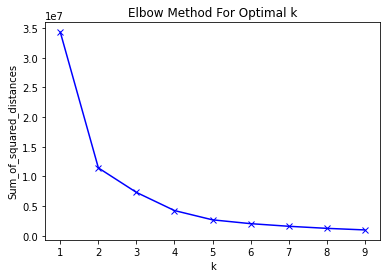

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
k_means = KMeans(n_clusters=2)
k_means.fit(data.values)
clusters = k_means.fit_predict(data.values)

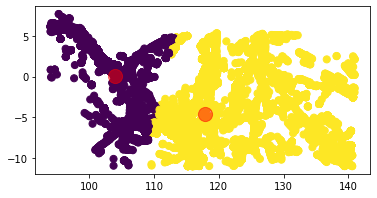

In [8]:
plt.scatter(data.values[:, 1], data.values[:, 0], c=clusters, s=50, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.5);
plt.gca().set_box_aspect(0.5)

In [9]:
data.values

array([[ -5.88408833, 137.317055  ],
       [ -5.55512167, 135.5826633 ],
       [ -7.42238833, 133.89884   ],
       ...,
       [ -6.097015  , 106.886715  ],
       [ -6.09701833, 106.886715  ],
       [ -6.09702667, 106.886705  ]])

In [10]:
k_means_riemann = KMeans(n_clusters=2, n_jobs=-2)
k_means_riemann.fit(data.values)
clusters_riemann = k_means_riemann.fit_predict(data.values)

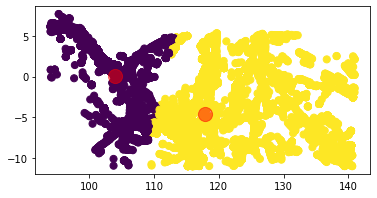

In [11]:
plt.scatter(data.values[:, 1], data.values[:, 0], c=clusters_riemann, s=50, cmap='viridis')

centers_riemann = k_means_riemann.cluster_centers_
plt.scatter(centers_riemann[:, 1], centers_riemann[:, 0], c='red', s=200, alpha=0.5);
plt.gca().set_box_aspect(0.5)

In [ ]:
k_means_riemann = KMeans(n_clusters=2, n_jobs=-2, metric='wasserstein')
k_means_riemann.fit(data.values)
clusters_riemann = k_means_riemann.fit_predict(data.values)')
k_means_riemann.fit(data.values)
clusters_riemann = k_means_riemann.fit_predict(data.values)